# **Detección de síndrome del ojo seco empleando atributos del estilo de vida de la persona y variables medicas**

## Import the necesary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')

## Data Loading

In [2]:
url='https://drive.google.com/uc?export=download&id=1rsinyuJoJesd_UyrLaD0u-ECzJH4PHFA'

In [3]:
df=pd.read_csv(url)
df.head()

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,...,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease
0,F,24,9.5,2,1,137/89,67,3000,31,161,...,N,Y,Y,N,8.7,N,Y,Y,N,Y
1,M,39,9.6,2,3,108/64,60,12000,74,164,...,N,Y,Y,N,9.6,Y,N,N,Y,Y
2,F,45,5.4,1,5,134/81,95,12000,93,179,...,N,N,N,Y,4.0,N,Y,N,N,N
3,F,45,5.4,4,5,110/90,78,19000,32,160,...,N,Y,N,N,7.6,N,Y,N,Y,N
4,F,42,5.7,3,2,99/67,72,4000,173,179,...,N,Y,N,N,3.5,N,Y,Y,N,Y


## EDA

In [44]:
df.shape

(20000, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       20000 non-null  object 
 1   Age                          20000 non-null  int64  
 2   Sleep duration               20000 non-null  float64
 3   Sleep quality                20000 non-null  int64  
 4   Stress level                 20000 non-null  int64  
 5   Blood pressure               20000 non-null  object 
 6   Heart rate                   20000 non-null  int64  
 7   Daily steps                  20000 non-null  int64  
 8   Physical activity            20000 non-null  int64  
 9   Height                       20000 non-null  int64  
 10  Weight                       20000 non-null  int64  
 11  Sleep disorder               20000 non-null  object 
 12  Wake up during night         20000 non-null  object 
 13  Feel sleepy duri

### Missing Values

In [12]:
print('Missing Values',df.isna().sum().sort_values(ascending=False)[:20],sep='\n')

Missing Values
Gender                         0
Age                            0
Itchiness/Irritation in eye    0
Redness in eye                 0
Discomfort Eye-strain          0
Blue-light filter              0
Average screen time            0
Smart device before bed        0
Ongoing medication             0
Medical issue                  0
Smoking                        0
Alcohol consumption            0
Caffeine consumption           0
Feel sleepy during day         0
Wake up during night           0
Sleep disorder                 0
Weight                         0
Height                         0
Physical activity              0
Daily steps                    0
dtype: int64


### Describe the samples

In [22]:
df.describe()

,Age,Sleep duration,Sleep quality,Stress level,Heart rate,Daily steps,Physical activity,Height,Weight,Average screen time
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,31.422800,6.998245,2.997250,2.993750,79.912200,10536.900000,90.069750,174.865900,74.891850,5.519885
std,8.103717,1.731723,1.412283,1.407235,11.808279,5752.729186,52.317283,14.719903,14.733839,2.606305
min,18.000000,4.000000,1.000000,1.000000,60.000000,1000.000000,0.000000,150.000000,50.000000,1.000000
25%,24.000000,5.500000,2.000000,2.000000,70.000000,6000.000000,45.000000,162.000000,62.000000,3.300000
50%,31.000000,7.000000,3.000000,3.000000,80.000000,11000.000000,91.000000,175.000000,75.000000,5.500000
75%,39.000000,8.500000,4.000000,4.000000,90.000000,16000.000000,135.000000,188.000000,88.000000,7.800000
max,45.000000,10.000000,5.000000,5.000000,100.000000,20000.000000,180.000000,200.000000,100.000000,10.000000


In [50]:
bins=int(1+np.log2(df.shape[0]))

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.ensemble import RandomForestClassifier

numerical_data=df.select_dtypes(include=[np.number])
stadarn=StandardScaler()
numerical_data=stadarn.fit_transform(numerical_data)
y=df['Dry Eye Disease']
enconded_label=LabelEncoder().fit_transform(y)
X,y=SMOTE(sampling_strategy='minority').fit_resample(numerical_data,enconded_label)
print(Counter(y))
model=RandomForestClassifier()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Accuracy:',accuracy_score(y_test,y_pred))

Counter({1: 13037, 0: 13037})
Accuracy: 0.7384467881112177


In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.63      0.71      2607
           1       0.70      0.85      0.76      2608

    accuracy                           0.74      5215
   macro avg       0.75      0.74      0.74      5215
weighted avg       0.75      0.74      0.74      5215



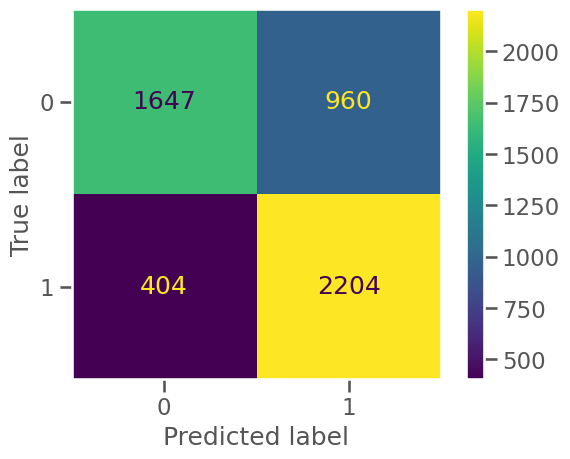

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
sns.set_context('talk')
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred,labels=model.classes_))
disp.plot(cmap="viridis")  # Cambia el cmap si quieres otro estilo
plt.grid(False)
plt.show()

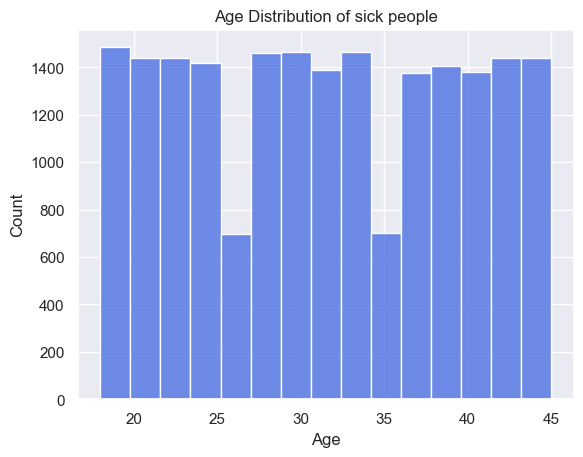

In [63]:
sns.histplot(df['Age'],bins=bins,color="royalblue")
plt.title('Age Distribution of sick people')
plt.show()

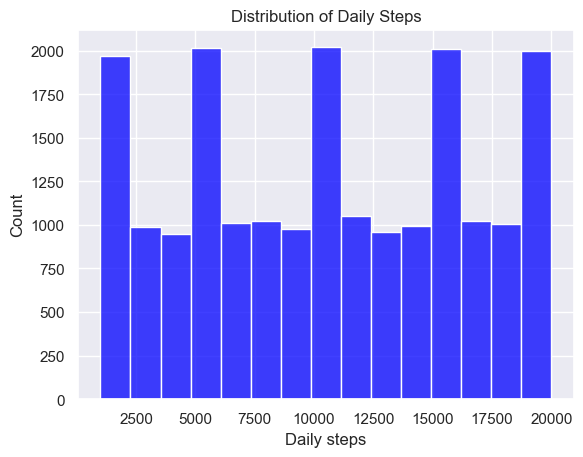

In [62]:
sns.histplot(df['Daily steps'],bins=bins,color="blue")
plt.title('Distribution of Daily Steps')
plt.show()

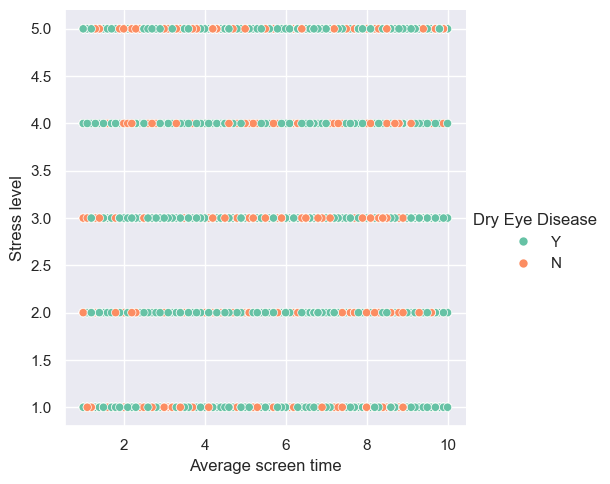

In [66]:
sns.relplot(data=df,x='Average screen time',y='Stress level',hue='Dry Eye Disease',palette='Set2')
plt.show()

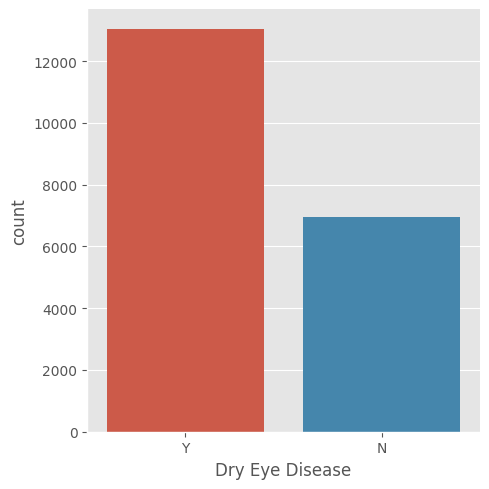

In [21]:
sns.catplot(x='Dry Eye Disease',kind='count',data=df,hue='Dry Eye Disease')
plt.show()

In [16]:
categorical_data=df.select_dtypes(include='object')
categorical_data

,Gender,Blood pressure,Sleep disorder,Wake up during night,Feel sleepy during day,Caffeine consumption,Alcohol consumption,Smoking,Medical issue,Ongoing medication,Smart device before bed,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease
0,F,137/89,Y,N,N,N,N,N,Y,Y,N,N,Y,Y,N,Y
1,M,108/64,N,N,N,N,Y,N,Y,Y,N,Y,N,N,Y,Y
2,F,134/81,Y,Y,N,Y,Y,N,N,N,Y,N,Y,N,N,N
3,F,110/90,N,N,N,Y,N,N,Y,N,N,N,Y,N,Y,N
4,F,99/67,N,Y,N,N,N,N,Y,N,N,N,Y,Y,N,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,M,132/64,N,Y,Y,N,N,Y,Y,Y,Y,N,Y,N,Y,Y
19996,F,101/75,Y,N,Y,N,Y,N,Y,Y,N,N,N,Y,N,Y
19997,F,124/63,N,N,Y,Y,Y,Y,Y,N,N,N,N,Y,N,N
19998,M,136/70,N,Y,N,Y,Y,Y,N,Y,N,N,N,N,Y,Y
